In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
from seaborn import color_palette
from tqdm import tqdm
%matplotlib inline

In [2]:
import easydarkfigs

In [3]:
%set_lightfigdir figures/
%set_darkfigdir figures_dark/

In [4]:
from dynesty import utils as dyfunc

In [5]:
from scipy.stats import norm

In [6]:
from setup_files.mocks_paper1.mock_models import models, run_names, results as res

In [7]:
max_logls = pd.read_csv('setup_files/mocks_paper1/max_logls.csv', index_col=0)
max_logls.head()

,logl_mean,logl_true
run_name,,
mock_1,-983.398,-1057.917
mock_2,-53.607,-73.388
mock_3,-931.613,-953.908
mock_4,-46.549,-424.866
mock_5,-962.418,-1009.488


In [8]:
plt.style.use('cook')
light_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][0]
dark_color = [c['color'] for c in plt.rcParams['axes.prop_cycle']][2]

# Figure 4

In [9]:
r = res['mock_8']
max_logl = max_logls.loc['mock_8'].logl_mean

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


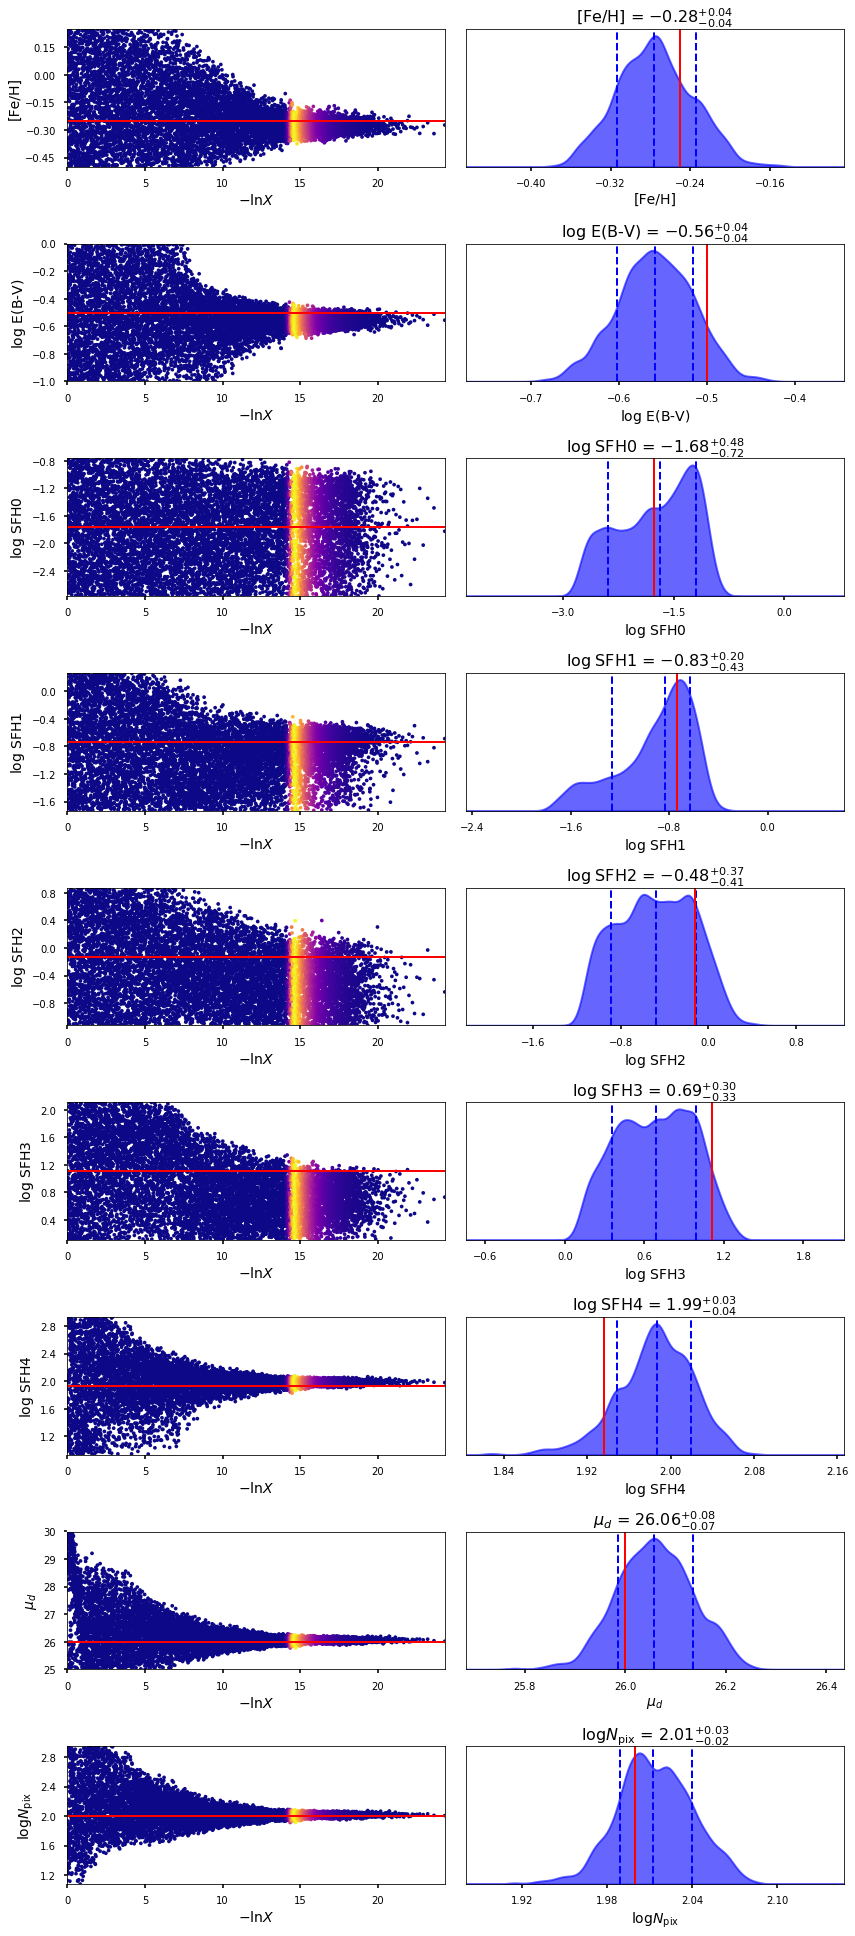

In [10]:
fig, axes = r.plot_trace(max_logl=max_logl);
plt.tight_layout()

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-

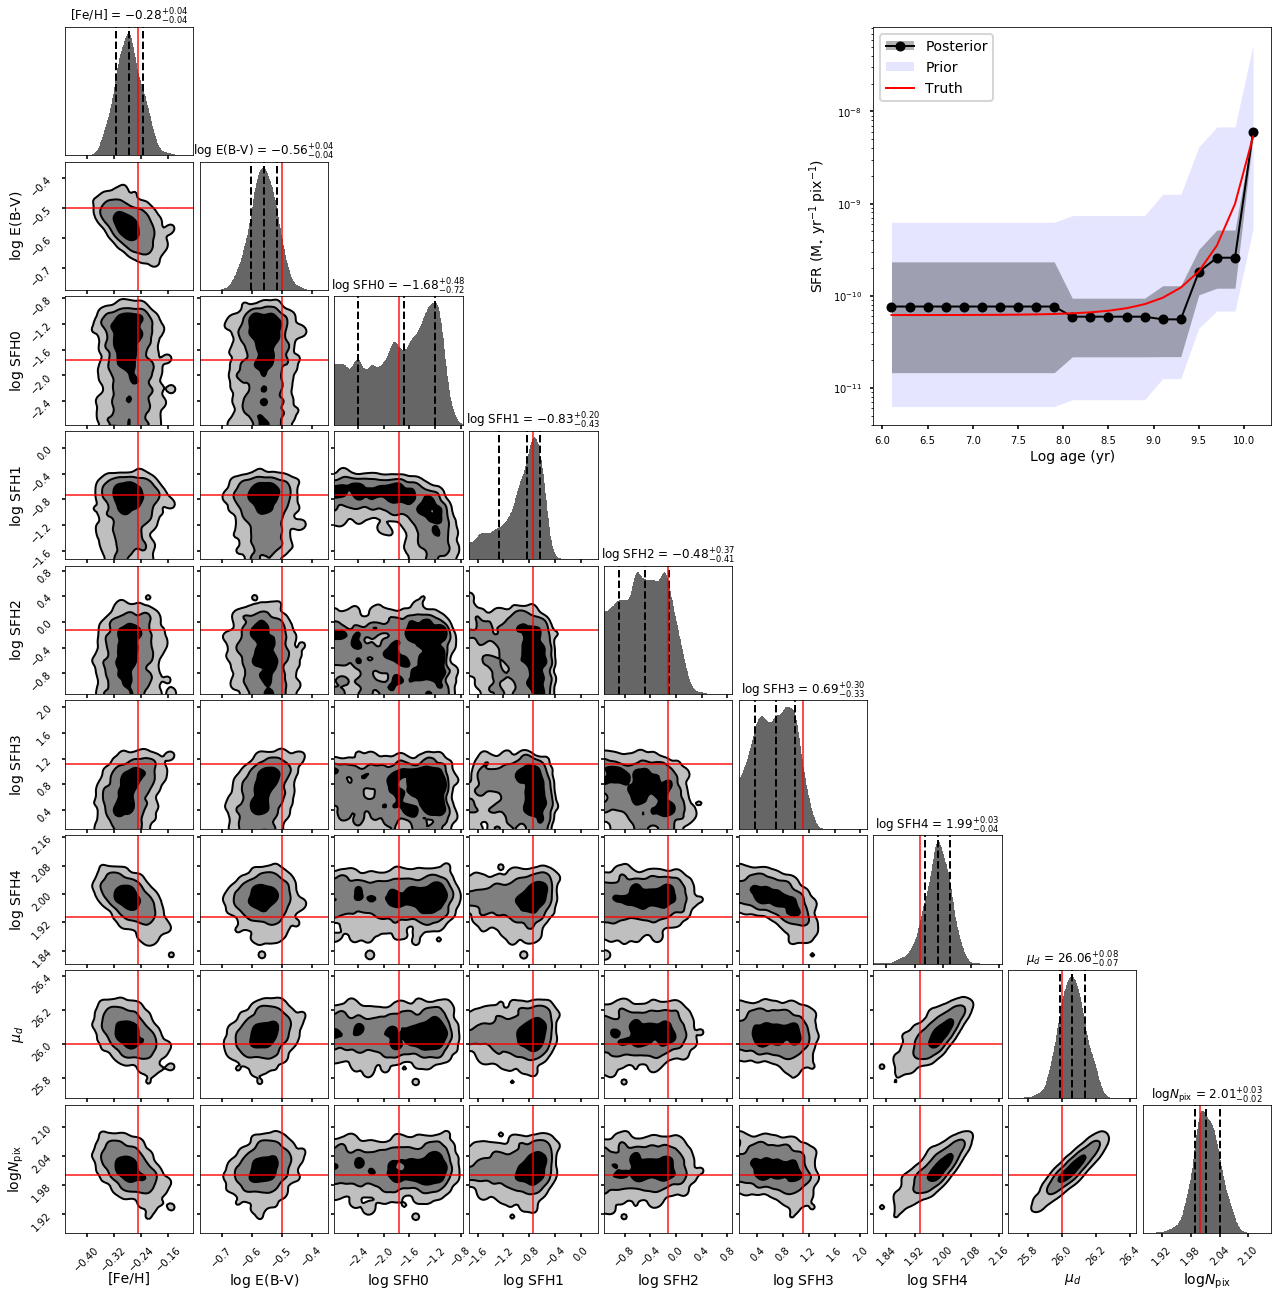

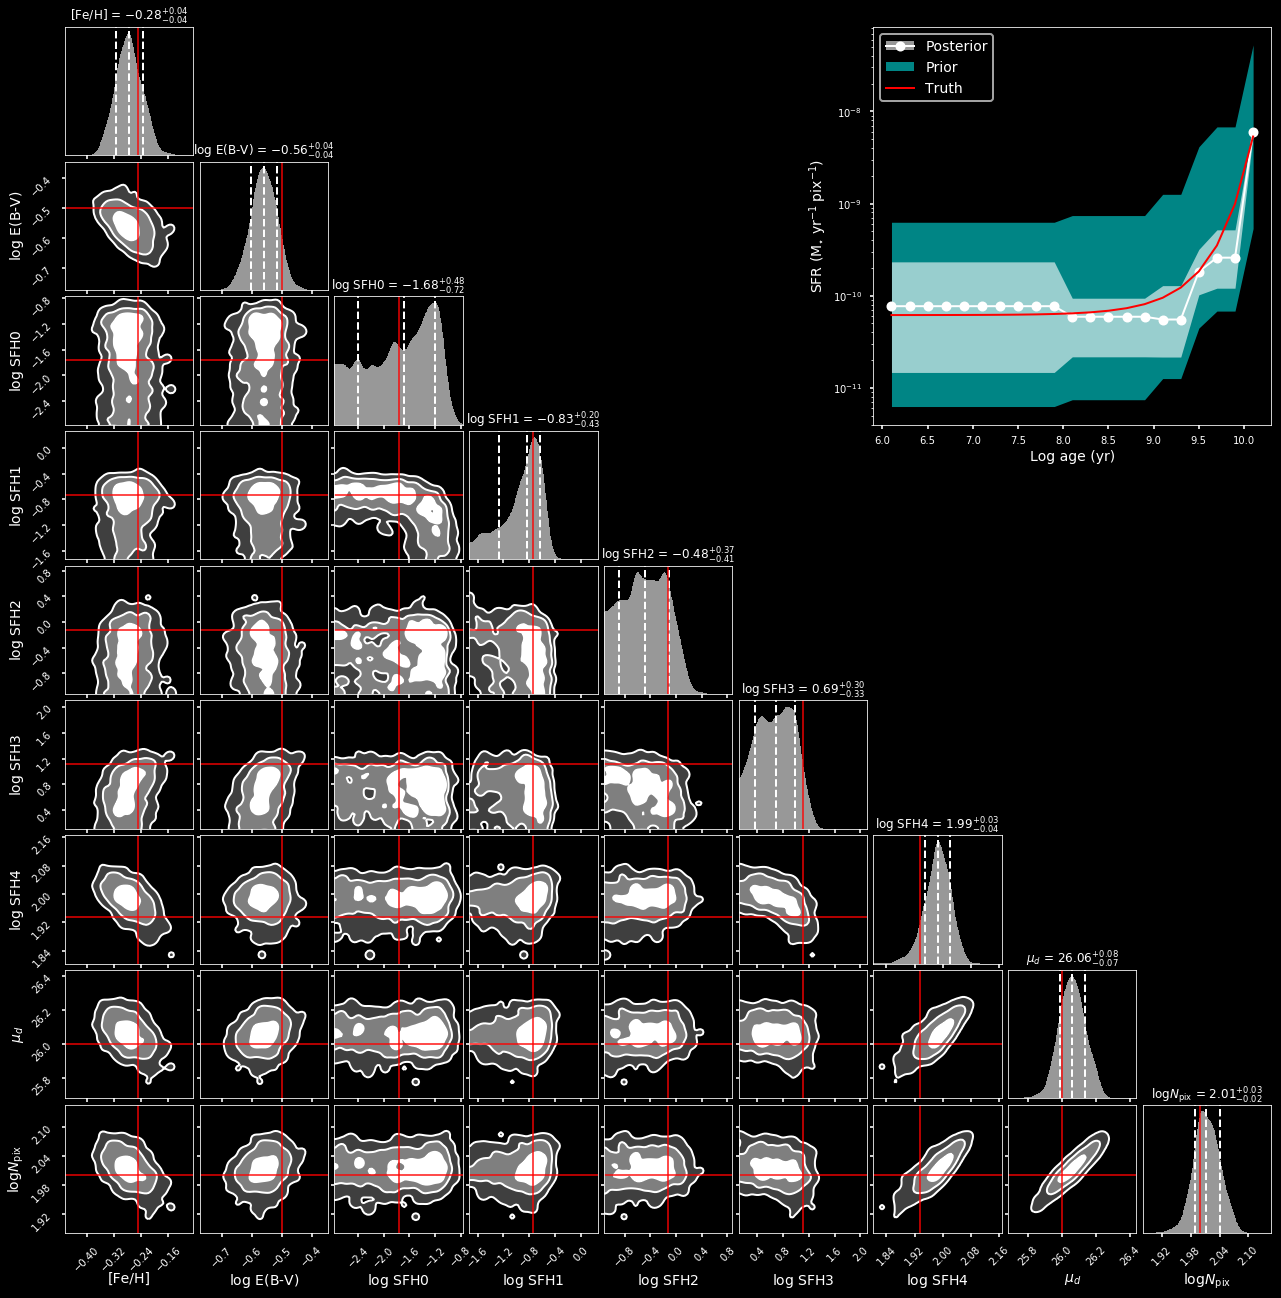

In [11]:
%%savefig_dark_light paper1/NonParam_Corner.pdf
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(max_logl=max_logl, fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 6:])
_, lines = r.plot_sfr(ax=axbig, max_logl=max_logl, true_model=res['mock_5'].true_model,
                      error_kwargs={'alpha': 0.})

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/NonParam_Corner_cumulative.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-

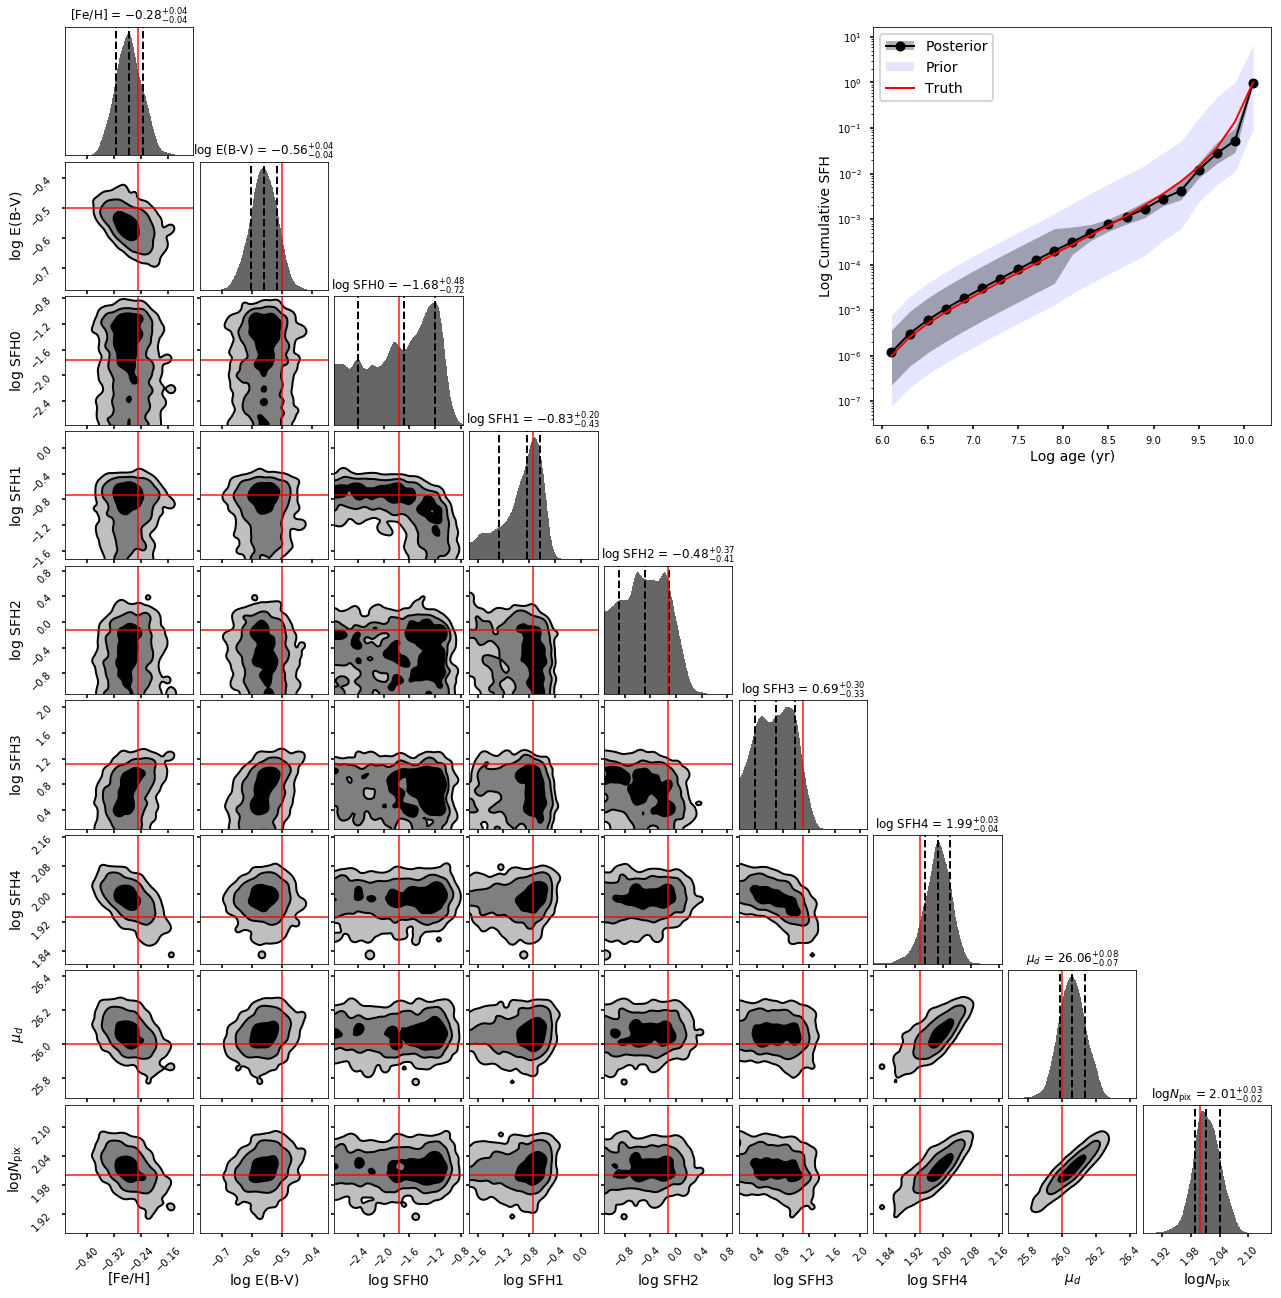

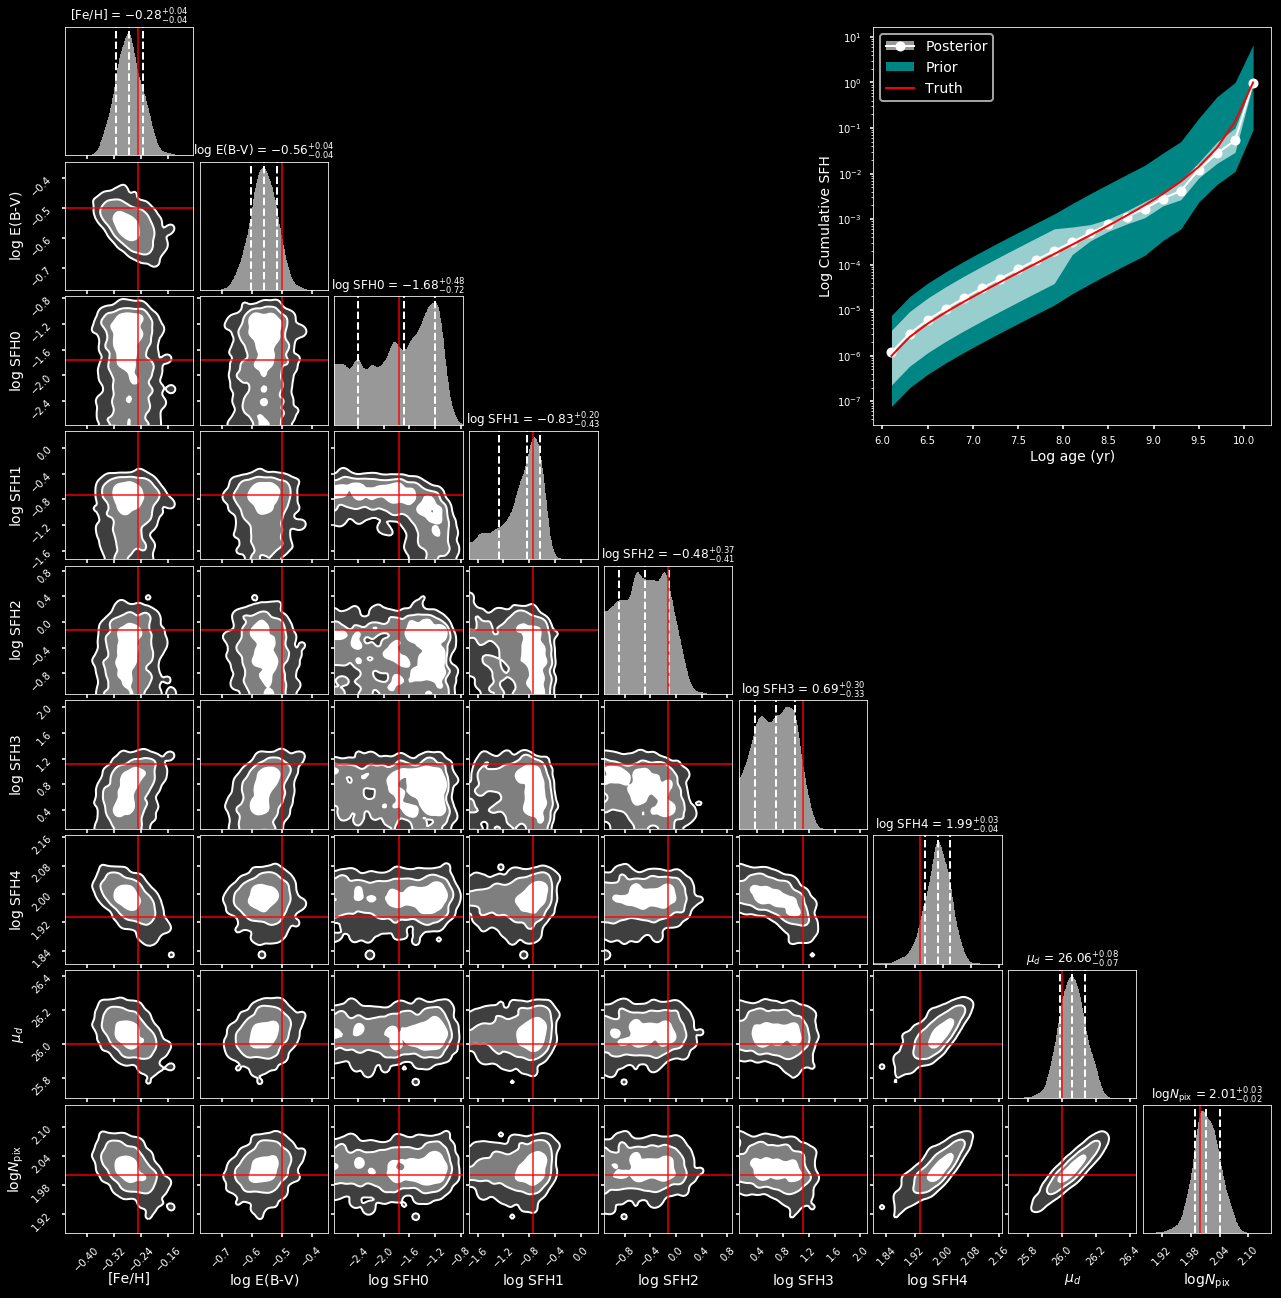

In [12]:
%%savefig_dark_light paper1/NonParam_Corner_cumulative.pdf
fig, axes = plt.subplots(ncols=9, nrows=9, figsize=(18, 18))
fig, axes = r.plot_corner(max_logl=max_logl, fig=(fig,axes))
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(9):
    for j in range(9):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:3, 6:])
_, lines = r.plot_cum_sfh(ax=axbig, max_logl=max_logl, true_model=res['mock_5'].true_model,
                          error_kwargs={'alpha': 0.})

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
Saving light figure as figures/paper1/Tau_Corner.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support None instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy

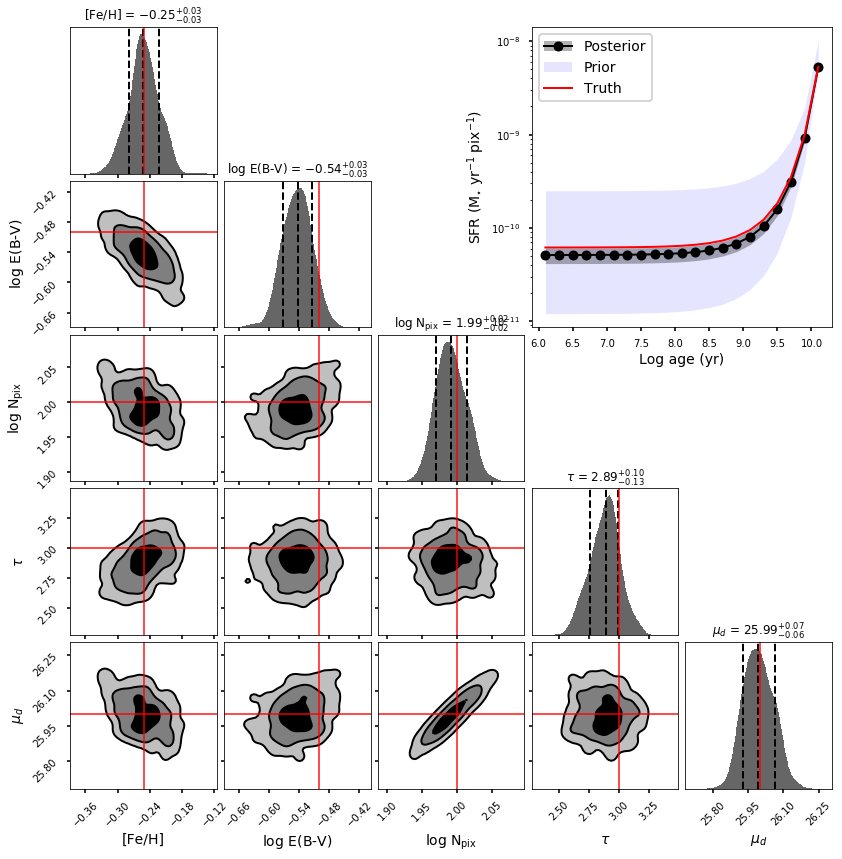

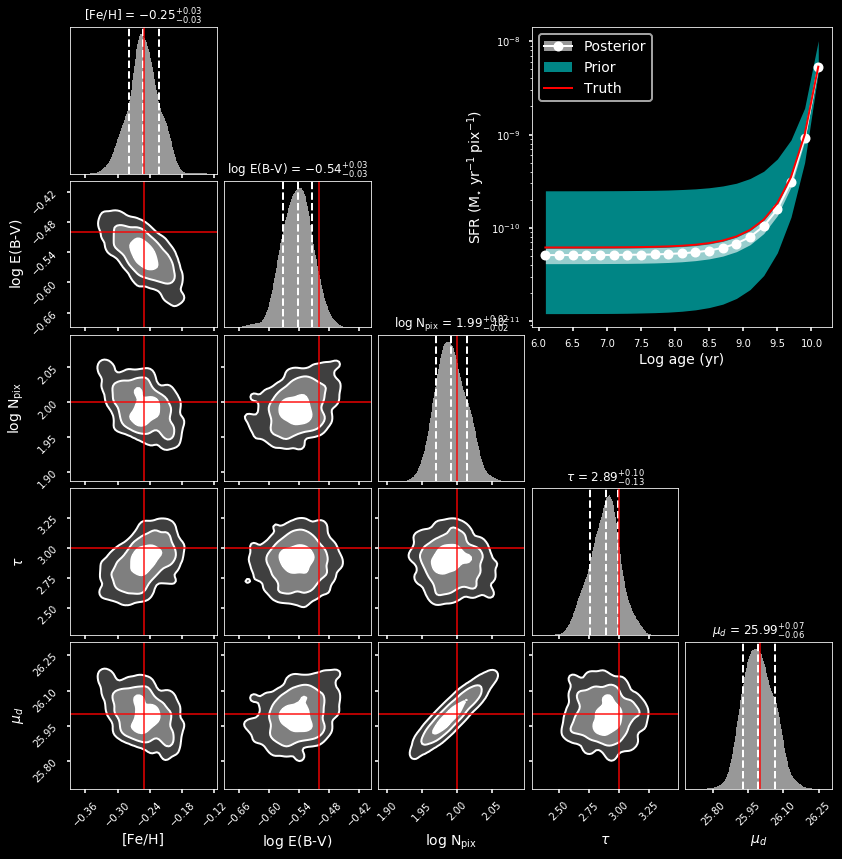

In [15]:
%%savefig_dark_light paper1/Tau_Corner.pdf
r = res['mock_5']
max_logl = max_logls.loc['mock_5'].logl_mean
fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(12, 12))
fig, axes = r.plot_corner(max_logl=max_logl, fig=(fig,axes));
for ax in axes.flatten():
    ax.title.set_fontsize(12.)
gs = axes[0,0].get_gridspec()
for i in range(5):
    for j in range(5):
        if j > i:
            axes[i,j].remove()
axbig = fig.add_subplot(gs[:2, 3:])
_, lines = r.plot_sfr(ax=axbig, max_logl=max_logl, true_model=res['mock_5'].true_model,
                      error_kwargs={'alpha': 0.}, prior_kwargs={'width': 68.})

# Figure 5

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Npix.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Npix_dark.pdf


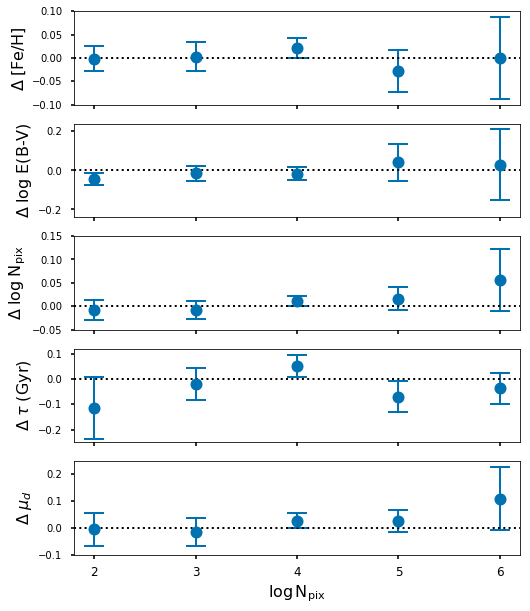

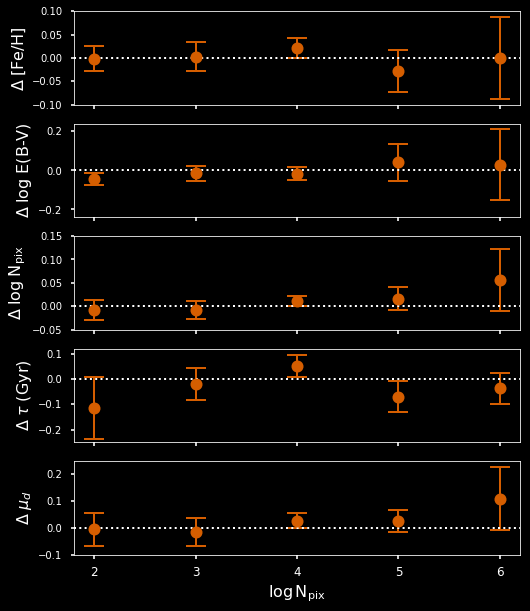

In [27]:
%%savefig_dark_light paper1/Npix.pdf
fig, axes = plt.subplots(nrows=5, figsize=(8, 10), sharex=True)
keys = ['mock_5', 'mock_25', 'mock_26', 'mock_27', 'mock_28']
Npixs = np.arange(2, 7)
means = np.array([res[k].means(max_logl=max_logls.loc[k].logl_mean) for k in keys])
stds = np.array([res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys])
truths = np.array([res[k].true_params for k in keys])

color = (dark_color if is_dark else light_color)
for i in range(5):
    ax = axes[i]
    ax.errorbar(Npixs, y=means[:, i]-truths[:, i], yerr=stds[:, i],
                marker='o', ms=10, capsize=10, ls='', color=color)
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-.24, .24])
axes[2].set_ylim([-.05, .15])
axes[3].set_ylim([-.25, .12])
axes[4].set_ylim([-.1, 0.25])
axes[-1].set_xlabel(r'$\log\,\mathrm{N_{pix}}$', fontsize=16)
axes[-1].set_xticks([2, 3, 4, 5, 6])
axes[-1].set_xticklabels([2, 3, 4, 5, 6], fontsize=12)

# Figure 6 - Variance

In [28]:
keys = ['mock_5', 'mock_34', 'mock_35', 'mock_36', 'mock_37', 'mock_38', 'mock_39', 'mock_40']
means = np.array([res[k].means(max_logl=max_logls.loc[k].logl_mean) for k in keys])
stds = np.array([res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys])

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


In [29]:
max_logls.loc[keys]

,logl_mean,logl_true
run_name,,
mock_5,-962.418,-1009.488
mock_34,-973.415,-995.879
mock_35,-944.624,-1102.877
mock_36,-919.538,-1067.334
mock_37,-1035.973,-1089.591
mock_38,-969.232,-1126.854
mock_39,-940.019,-1180.129
mock_40,-918.454,-1102.396


Saving light figure as figures/paper1/Errors.pdf
Saving dark figure as figures_dark/paper1/Errors_dark.pdf


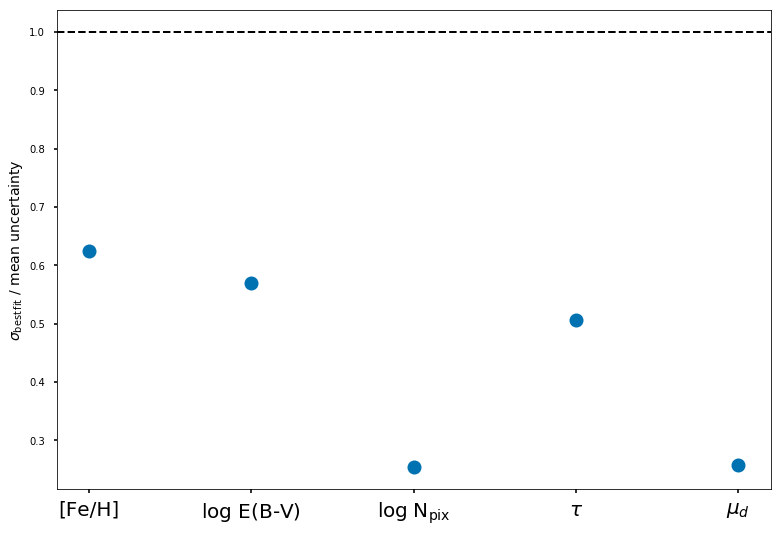

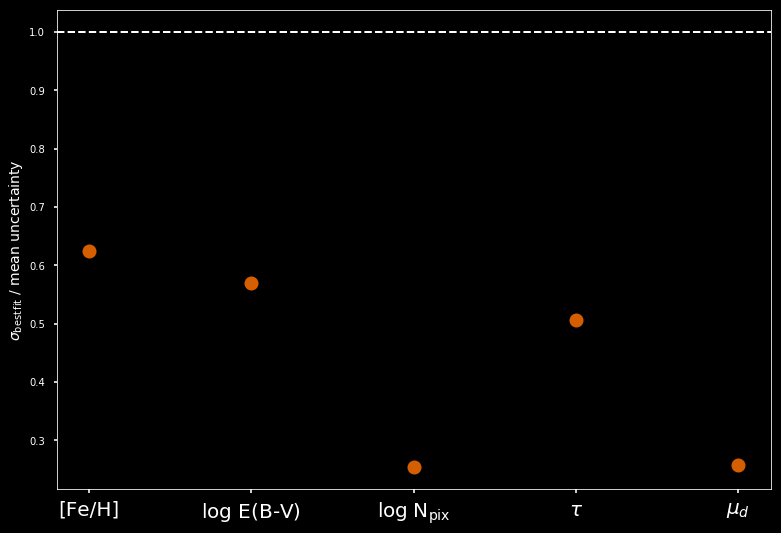

In [30]:
%%savefig_dark_light paper1/Errors.pdf
fig, ax = plt.subplots()
color = (dark_color if is_dark else light_color)
ax.plot(np.std(means, axis=0) / np.median(stds, axis=0), marker='o', ls='', color=color)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(res['mock_5'].labels, fontsize=20)
ax.axhline(y=1, ls='--')
ax.set_ylabel(r'$\sigma_\mathrm{best\,fit}$ / mean uncertainty')

# Figure 7 - Other Violins

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/ModelChoices.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/ModelChoices_dark.pdf


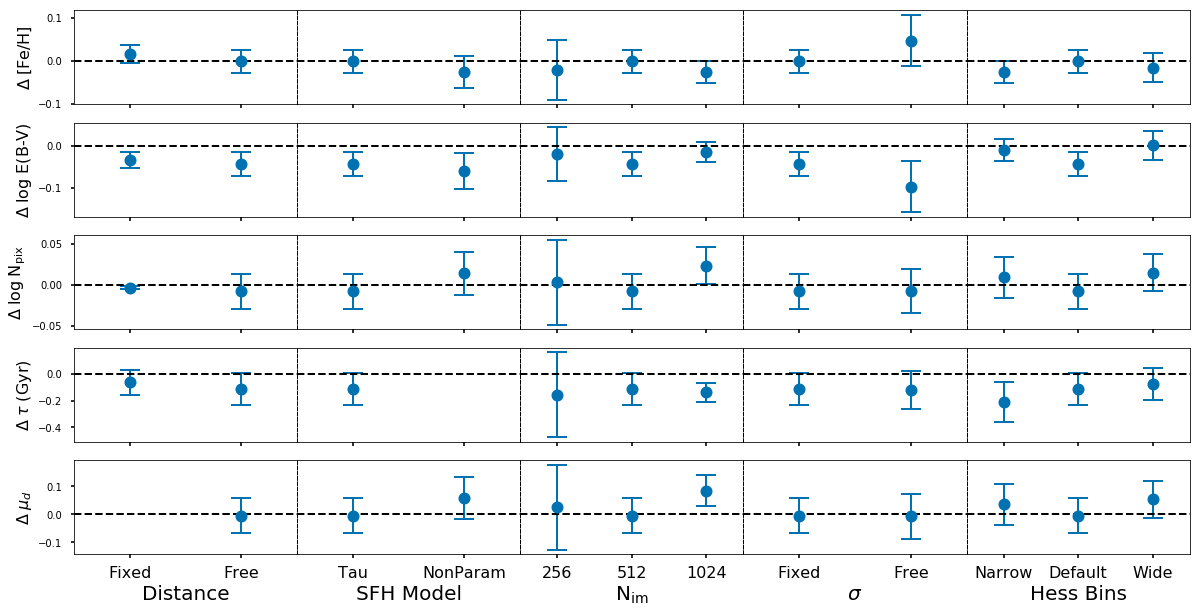

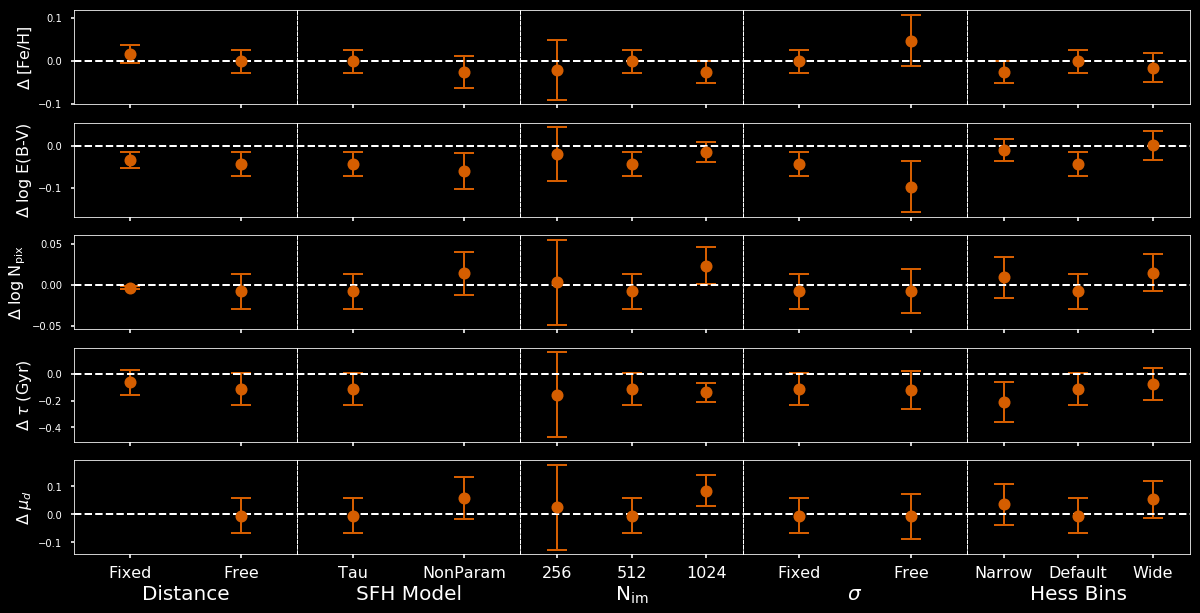

In [31]:
%%savefig_dark_light paper1/ModelChoices.pdf
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 10), sharex='col', sharey='row')
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        a = axes[i,j]
        if j > 0:
            a.spines['left'].set_linestyle('--')
            a.spines['left'].set_linewidth(1.)
            a.spines['left'].set_fill(False)
            a.yaxis.set_visible(False)
        if j < axes.shape[1]-1:
#             a.spines['right'].set_linestyle(':')
            a.spines['right'].set_visible(False)
plt.subplots_adjust(wspace=0.)

color = (dark_color if is_dark else light_color) 

# Distance
keys = ['mock_33', 'mock_5']
means = [list(res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params) for k in keys]
means[0].append(None)
stds = [list(res[k].stds(max_logl=max_logls.loc[k].logl_mean)) for k in keys]
stds[0].append(None)
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 0].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color=color)

# SFH
keys = ['mock_5', 'mock_8']
means = [res['mock_5'].means(max_logl=max_logls.loc['mock_5'].logl_mean)-res['mock_5'].true_params]
stds = [res['mock_5'].stds(max_logl=max_logls.loc['mock_5'].logl_mean)]
a = np.array(res['mock_8'].means(max_logl=max_logls.loc['mock_8'].logl_mean)-res['mock_8'].true_params)
b = res['mock_8'].stds(max_logl=max_logls.loc['mock_8'].logl_mean)
means.append([a[0], a[1], a[-1], None, a[-2]])
stds.append([b[0], b[1], b[-1], None, b[-2]])
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 1].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color=color)

# Nim
keys = ['mock_10', 'mock_5', 'mock_11']
means = [list(res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params) for k in keys]
stds = [list(res[k].stds(max_logl=max_logls.loc[k].logl_mean)) for k in keys]
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 2].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color=color)

# sig
keys = ['mock_5', 'mock_8']
means = [res['mock_5'].means(max_logl=max_logls.loc['mock_5'].logl_mean)-res['mock_5'].true_params]
stds = [res['mock_5'].stds(max_logl=max_logls.loc['mock_5'].logl_mean)]
a = np.array(res['mock_6'].means(max_logl=max_logls.loc['mock_6'].logl_mean)-res['mock_6'].true_params)
b = res['mock_6'].stds(max_logl=max_logls.loc['mock_6'].logl_mean)
means.append([a[0], a[2], a[4], a[5], a[6]])
stds.append([b[0], b[2], b[4], b[5], b[6]])
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 3].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color=color)

# Hess Bins
keys = ['mock_30', 'mock_5', 'mock_29']
means = [list(res[k].means(max_logl=max_logls.loc[k].logl_mean)-res[k].true_params) for k in keys]
stds = [list(res[k].stds(max_logl=max_logls.loc[k].logl_mean)) for k in keys]
for i in range(5):
    for j in range(len(means)):
        if means[j][i] is not None:
            axes[i, 4].errorbar(x=j, y=means[j][i], yerr=stds[j][i], marker='o', ms=10,
                       ls='', capsize=10, color=color)
            
            
yl_size = 16
xl_size = 20
xt_size = 16
axes[-1, 0].set_xlabel('Distance', fontsize=xl_size)
axes[-1, 0].set_xticks([0, 1])
axes[-1, 0].set_xticklabels(['Fixed', 'Free'], fontsize=xt_size)
axes[-1, 0].set_xlim([-0.5, 1.5])

axes[-1, 1].set_xlabel('SFH Model', fontsize=xl_size)
axes[-1, 1].set_xticks([0, 1])
axes[-1, 1].set_xticklabels(['Tau', 'NonParam'], fontsize=xt_size)
axes[-1, 1].set_xlim([-0.5, 1.5])

axes[-1, 2].set_xlabel(r'$\mathrm{N_{im}}$', fontsize=xl_size)
axes[-1, 2].set_xticks([0, 1, 2])
axes[-1, 2].set_xticklabels([256, 512, 1024], fontsize=xt_size)
axes[-1, 2].set_xlim([-0.5, 2.5])

axes[-1, 3].set_xlabel(r'$\sigma$', fontsize=xl_size)
axes[-1, 3].set_xticks([0, 1])
axes[-1, 3].set_xticklabels(['Fixed', 'Free'], fontsize=xt_size)
axes[-1, 3].set_xlim([-0.5, 1.5])

axes[-1, 4].set_xlabel('Hess Bins', fontsize=xl_size)
axes[-1, 4].set_xticks([0, 1, 2])
axes[-1, 4].set_xticklabels(['Narrow', 'Default', 'Wide'], fontsize=xt_size)
axes[-1, 4].set_xlim([-0.5, 2.5])

for ax in axes.flatten():
    ax.axhline(y=0, ls='--')
for i in range(5):
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    axes[i, 0].set_ylabel(ylabel, fontsize=yl_size)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving light figure as figures/paper1/Model_Mismatch.pdf
/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt
Saving dark figure as figures_dark/paper1/Model_Mismatch_dark.pdf


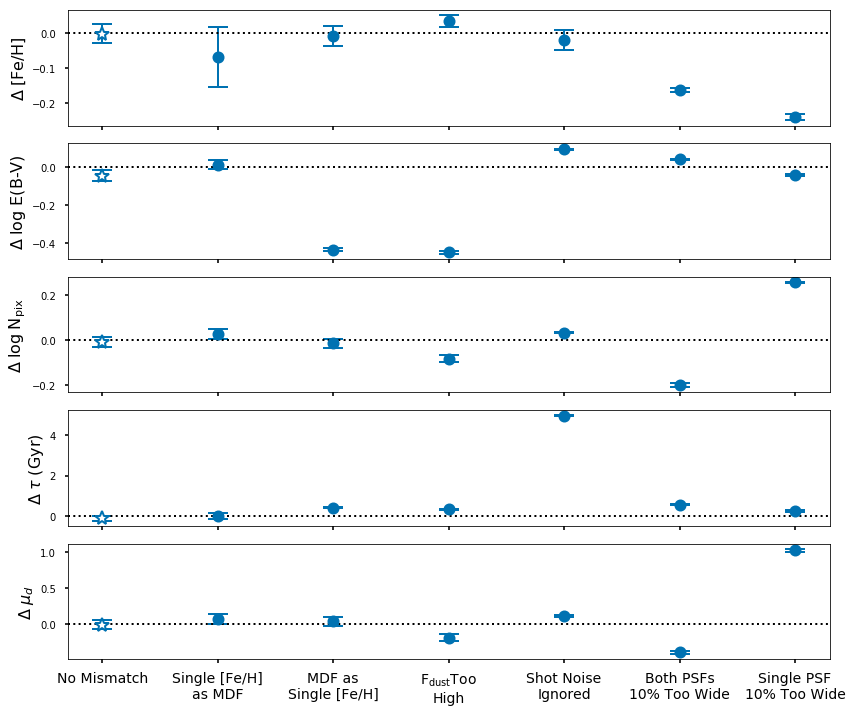

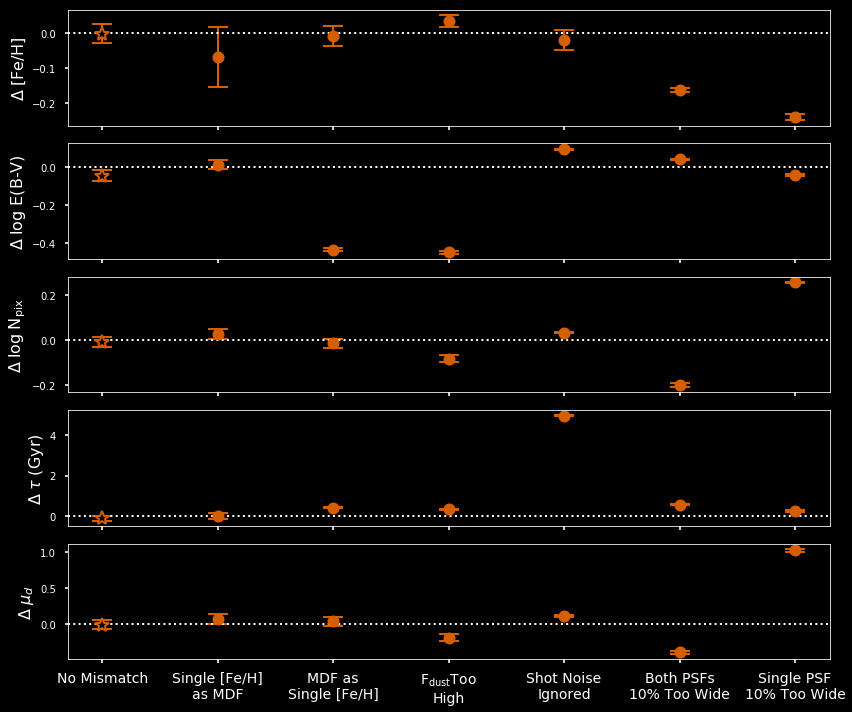

In [25]:
%%savefig_dark_light paper1/Model_Mismatch.pdf
color = (dark_color if is_dark else light_color) 
face = ('k' if is_dark else 'w')
fig, axes = plt.subplots(nrows=5, figsize=(12, 10), sharex=True)
keys = ['mock_5']
keys += ['mismatch_{:d}'.format(i) for i in [1,2,5,7,8,9]]
means = [res[k].means(max_logl=max_logls.loc[k].logl_mean) for k in keys]
stds = [res[k].stds(max_logl=max_logls.loc[k].logl_mean) for k in keys]
means = np.array(means)
stds = np.array(stds)
truths = [res[k].true_params for k in keys]
truths = np.array(truths)
x = np.arange(len(keys))

for i in range(5):
    ax = axes[i]
    ax.errorbar(x[0], y=means[0, i]-truths[0,i], yerr=stds[0, i],
               marker='*', ms=15, capsize=10, ls='', mfc=face, mew=2, color=color)
    ax.errorbar(x[1:], y=means[1:, i]-truths[1:, i], yerr=stds[1:, i],
                marker='o', ms=10, capsize=10, ls='', color=color)
    ax.axhline(y=0, ls=':')
    ylabel = r'$\Delta\;$' + res['mock_5'].labels[i]
    if i == 3:
        ylabel += ' (Gyr)'
    ax.set_ylabel(ylabel, fontsize=16)
    
axes[-1].set_xticks(x)
axes[-1].set_xticklabels([
    'No Mismatch',
    'Single [Fe/H]\nas MDF',
    'MDF as\nSingle [Fe/H]',
    r'$\mathrm{F_{dust}}$Too'+'\nHigh',
    'Shot Noise\nIgnored',
    'Both PSFs\n10% Too Wide',
    'Single PSF\n10% Too Wide'],
    rotation=0, fontsize=14)
plt.tight_layout()

# Figure 7

In [16]:
r = res['mock_5']

In [17]:
r.df.logl.max()

-868.35

In [18]:
max_logls.loc['mock_5']

logl_mean    -962.418
logl_true   -1009.488
Name: mock_5, dtype: float64

In [20]:
logls = np.linspace(r.df.logl.max(), -1050., 100)
means = np.array([r.means(max_logl=l) for l in tqdm(logls)])
stds = np.array([r.stds(max_logl=l) for l in tqdm(logls)])

100%|██████████| 100/100 [00:11<00:00,  8.43it/s]


Saving light figure as figures/paper1/Likelihood_Ceiling.pdf
Saving dark figure as figures_dark/paper1/Likelihood_Ceiling_dark.pdf


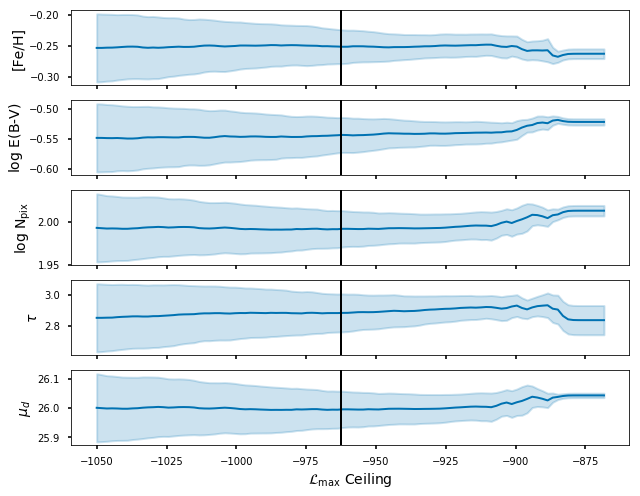

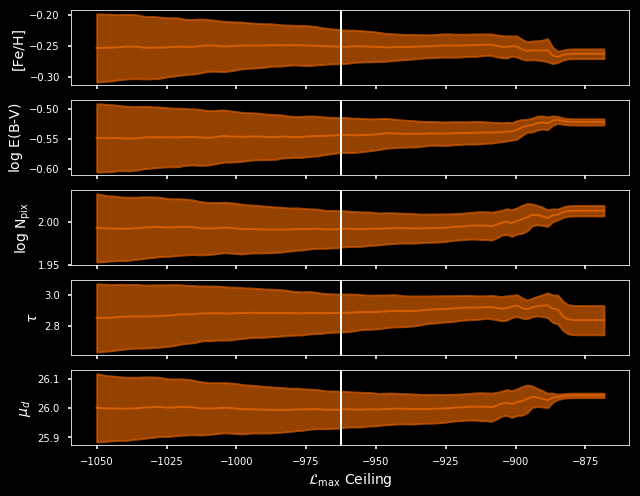

In [21]:
%%savefig_dark_light paper1/Likelihood_Ceiling.pdf
fig, axes = plt.subplots(nrows=5, figsize=(10, 8), sharex=True)
for i in range(5):
    axes[i].plot(logls, means[:, i], color=(dark_color if is_dark else light_color))
    axes[i].fill_between(logls, y1=means[:,i]+stds[:,i], y2=means[:,i]-stds[:,i], alpha=(0.7 if is_dark else 0.2), zorder=-1, color=(dark_color if is_dark else light_color))
    axes[i].axvline(x=max_logls.loc['mock_5'].logl_mean, ls='-')
    axes[i].set_ylabel(r.labels[i])
axes[-1].set_xlabel(r'$\mathcal{L}_\mathrm{max}$ Ceiling')
# plt.savefig('figures/paper1/Likelihood_Cutoffs.pdf')

In [38]:
colors = color_palette('colorblind', 10).as_hex()

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


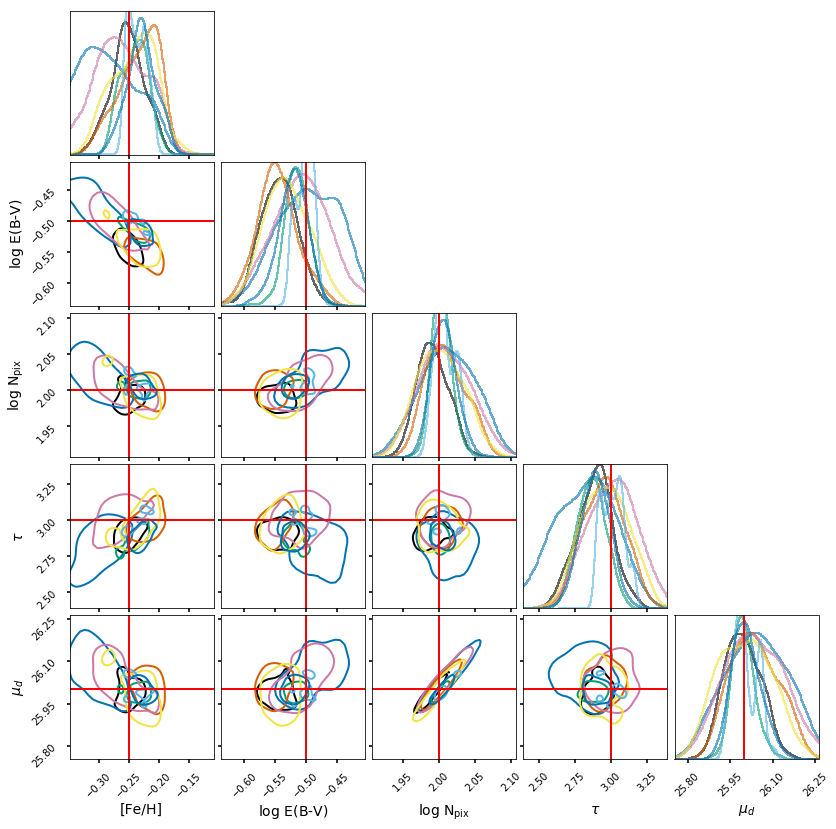

In [39]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(34, 41)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)

/Users/bcook/anaconda/envs/py36/lib/python3.6/site-packages/dynesty-0.9.2b0-py3.6.egg/dynesty/utils.py:679: RuntimeWarning: invalid value encountered in sqrt


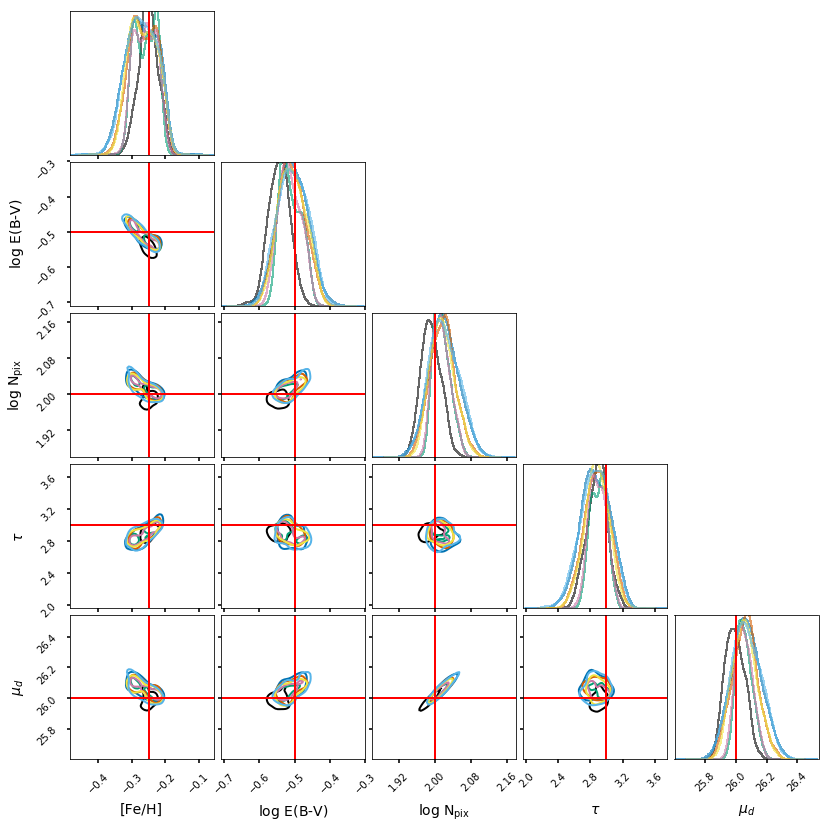

In [45]:
r = res['mock_5']
fig = r.plot_corner(max_logl=max_logls.loc['mock_5'].logl_mean, filled=False, sig_levels=[1], show_titles=False, quantiles=[], smooth=0.03)
for i, d in enumerate(range(18, 24)):
    k = 'mock_{:d}'.format(d)
    r = res[k]
    c = colors[i]
    r.plot_corner(max_logl=max_logls.loc[k].logl_mean, filled=False, sig_levels=[1], color=c, show_titles=False, fig=fig, quantiles=[], smooth=0.03)